<a href="https://colab.research.google.com/github/davidnene/Twitter-Data-Analysis/blob/main/Data_Mining_Project_Challenge__Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project:** Data Minining Project for  X company

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### The data is for company X which is trying to control attrition. 
### There are two sets of data: "Existing employees" and "Employees who have left". The following attributes are available for every employee.


*   Satisfaction Level

*   Last evaluation

*   Number of projects

*   Average monthly hours

*   Time spent at the company
*   Whether they have had a work accident


*  Whether they have had a promotion in the last 5 years


*   Departments (column sales)


*   Salary


*  Whether the employee has left


















**Your Role**
 

*   As data science team member X company asked you to answer this two questions.
*  What type of employees is leaving? 

*   Determine which employees are prone to leave next.






Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [72]:
main_objectives = '''1. To do data preparation and Exploratory Data Analysis so as 
                       to understand the data and determine what type of employee is leaving
                     2. To build a efficiently working ML model that can be used to make predictions
                       what type of employee is prone to leaving based on new incoming data
                  '''

In [73]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [74]:
dm_outline = '''1. Univariate analysis to understand the important variables
                2. Multivariate analysis to understand relationships between variables in relation to the output.
                    eg.correlation
'''

In [75]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

**Confusion Matrix**

[[TP FP]
 
 [FN TN]]

 **Accuracy**

 $\frac{(TP+TN)}{total}$ 

 
 **Sensitivity**
 
 $\frac{TP}{actualyes}$

**F-Score**

$\frac{tp}{(tp + 1/2(fp+fn)}$


**Classification report**

e.g. Precision = $\frac{TP}{(TP + FP)}$



Why do you choose these metrics? minimum of 100 characters

In [76]:
why_metrics = ''' 1. The above metrics will measure the performance of the model on different dimensions
                  2. They will also be able to capture model bias ie overfitting or underfitting
                  3. Classification report will have attention to detail on whether the data is imbalanced
              '''

In [77]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [78]:
how_success = '''Data analysis will be a success if I will be able to;
                           1. answer the question on type of employee that is leaving
                           2. Give insights eg on feature engineering for model preparation
              '''

In [79]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [80]:
challenge_text = '''1. Performing data cleaning
                    2. Understanding data into details
                    3. Converting the business problem into a data science problem.
                       eg determing the important features for this particular project
                  '''

In [81]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [82]:
#importing prerequisite libraries

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
#loading the data

employees_df = pd.read_csv('/content/cleaned_fintech_data.csv')
employees_df.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,0,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,0,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,0,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,0,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,0,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [84]:
#cleanTweet dataframe
cleanTweet = employees_df[['clean_text','polarity']]

In [85]:
cleanTweet.sample(10)

,clean_text,polarity
282,Adhi Vadu Ah roje delete chesadra Pilla Pogo ....,0.0
4965,Today Restoring degraded land ... creates jobs...,0.0
2750,Macam-macam bentuk selaput dara Elastisitas be...,0.5
3208,Telugu states Following .. MB Mega family Indi...,0.0
252,Ceeded break up.Remaining centers kuda tesukuv...,0.0
3119,Credit/Debit yrs kastam .. Top lo kuda compari...,0.5
352,Height Okkakkadu bujam dhaggaraki kuda raaru d...,-0.1
3605,Last time nen edho rd class trolls rendu esa a...,-0.029166666666666664
1302,Adhi Vadu Ah roje delete chesadra Pilla Pogo ....,0.0
4077,Every wash cycle leaves carbon footprint Tide ...,0.0


In [86]:
#checking on data info
cleanTweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  5617 non-null   object
 1   polarity    5621 non-null   object
dtypes: object(2)
memory usage: 88.0+ KB


In [87]:
#investigating polarity column
cleanTweet['polarity'].value_counts()

0.0                    2134
0.5                     340
-0.1                    252
0.13636363636363635     200
0.15416666666666667     144
                       ... 
0.23484848484848483       2
0.18409090909090908       2
0.45                      2
0.5681818181818181        2
polarity                  1
Name: polarity, Length: 246, dtype: int64

we observe there is a string called polarity.

we shall convert it to null then drop

In [88]:
#replace string polarity with null
cleanTweet['polarity'].replace({'polarity':np.nan}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
#confirming the null value
cleanTweet['polarity'].isnull().sum()

1

In [90]:
#drop null
cleanTweet = cleanTweet.dropna()

In [91]:
#confirming the null value
cleanTweet['polarity'].isnull().sum()

0

In [92]:
#converting to float
cleanTweet['polarity'] = cleanTweet['polarity'].astype(float)

In [93]:
#creating score column
cleanTweet['score'] = cleanTweet['polarity']

In [94]:
#locating values
negative = cleanTweet[cleanTweet['score'] < 0].index
neutral = cleanTweet[cleanTweet['score'] == 0].index
positive = cleanTweet[cleanTweet['score'] > 0].index

In [95]:
#coding the values
cleanTweet.loc[negative, 'score'] = 'negative'
cleanTweet.loc[neutral, 'score'] = 'neutral'
cleanTweet.loc[positive, 'score'] = 'positive'

In [96]:
cleanTweet['score'].value_counts()

positive    2648
neutral     2130
negative     838
Name: score, dtype: int64

Visualizations

Text(0, 0.5, 'count')

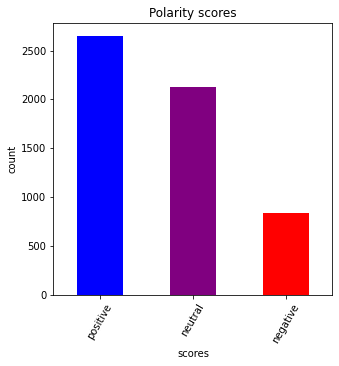

In [97]:
#Bar chart
colors = ['blue', 'purple','red']

plt.figure(figsize=(5,5))
cleanTweet['score'].value_counts().plot(kind='bar', rot = 60, color= colors)
plt.title('Polarity scores')
plt.xlabel('scores')
plt.ylabel('count')